## Build Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import lightgbm as lgb 
import xgboost as xgb

In [2]:
train_data = pd.read_csv(r"G:\IIITD\SML\Project\elo_merchant_category\train_final_features.csv")
train_data.head()

,Unnamed: 0,card_id,feature_1,feature_2,feature_3,active_days,feature_sum,feature_mean,feature_max,feature_min,...,merged_category_2_y_1.0_sum,merged_category_2_y_1.0_mean,merged_category_2_y_2.0_sum,merged_category_2_y_2.0_mean,merged_category_2_y_3.0_sum,merged_category_2_y_3.0_mean,merged_category_2_y_4.0_sum,merged_category_2_y_4.0_mean,merged_category_2_y_5.0_sum,merged_category_2_y_5.0_mean
0,0,C_ID_92a2005557,5,2,1,245,8,2.666667,5,1,...,23.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,1,C_ID_3d0044924f,4,1,0,396,5,1.666667,4,0,...,6.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,2,C_ID_d639edf6cd,2,2,0,549,4,1.333333,2,0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0,1.0
3,3,C_ID_186d6a6901,4,3,0,153,7,2.333333,4,0,...,1.0,0.142857,0.0,0.0,0.0,0.000000,6.0,0.857143,0.0,0.0
4,4,C_ID_cdbd2c0db2,1,3,0,92,4,1.333333,3,0,...,5.0,0.138889,0.0,0.0,7.0,0.194444,24.0,0.666667,0.0,0.0


In [3]:
test_data = pd.read_csv(r"G:\IIITD\SML\Project\elo_merchant_category\test_final_features.csv")
test_data.head()

,Unnamed: 0,card_id,feature_1,feature_2,feature_3,active_days,feature_sum,feature_mean,feature_max,feature_min,...,merged_category_2_y_1.0_sum,merged_category_2_y_1.0_mean,merged_category_2_y_2.0_sum,merged_category_2_y_2.0_mean,merged_category_2_y_3.0_sum,merged_category_2_y_3.0_mean,merged_category_2_y_4.0_sum,merged_category_2_y_4.0_mean,merged_category_2_y_5.0_sum,merged_category_2_y_5.0_mean
0,0,C_ID_0ab67a22ab,3,3,1,275,7,2.333333,3,1,...,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,C_ID_130fd0cbdd,2,3,0,365,5,1.666667,3,0,...,3.0,0.3,0.0,0.0,0.0,0.0,7.0,0.7,0.0,0.0
2,2,C_ID_b709037bc5,5,1,1,153,7,2.333333,5,1,...,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5
3,3,C_ID_d27d835a9f,2,1,0,31,3,1.000000,2,0,...,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,C_ID_2b5e3df5c2,5,1,1,762,7,2.333333,5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0


In [4]:
train_data.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [5]:
test_data.drop(["Unnamed: 0"], axis=1, inplace=True)

In [6]:
train_data.shape

(201917, 146)

In [7]:
# Move target column to the second index
target = train_data['target']
train_data.drop(labels=['target'], axis=1,inplace = True)
train_data.insert(1, 'target', target)
train_data.columns

Index(['card_id', 'target', 'feature_1', 'feature_2', 'feature_3',
       'active_days', 'feature_sum', 'feature_mean', 'feature_max',
       'feature_min',
       ...
       'merged_category_2_y_1.0_sum', 'merged_category_2_y_1.0_mean',
       'merged_category_2_y_2.0_sum', 'merged_category_2_y_2.0_mean',
       'merged_category_2_y_3.0_sum', 'merged_category_2_y_3.0_mean',
       'merged_category_2_y_4.0_sum', 'merged_category_2_y_4.0_mean',
       'merged_category_2_y_5.0_sum', 'merged_category_2_y_5.0_mean'],
      dtype='object', length=146)

## Select K-best features

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

def select_Kbest(data):
    X = data.iloc[:,2:]  #independent columns
    y = data.iloc[:,1]    #target column i.e price range
    #print(X)
    
    #apply SelectKBest class to extract top 10 best features
    bestfeatures = SelectKBest(score_func=f_regression, k=50)
    fit = bestfeatures.fit(X,y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    
    X_new = fit.transform(X)
    
    #concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Specs','Score']  #naming the dataframe columns
#     print(featureScores.nlargest(30,'Score'))  #print 10 best features
    features = featureScores.nlargest(50,'Score')
    column = features.columns
    x = list(features[column[0]])
    
    X_train = pd.DataFrame(data=X_new,columns=x)
    
    return X_train, features

X_train, features = select_Kbest(train_data)

In [9]:
impor = list(features['Score'])
fea = list(features['Specs'])
print(impor)
print(fea)
A = []
for i in range(30):
    A.append(i)

[692.3271657904068, 691.9952288347474, 676.6527690027953, 645.4030874102367, 638.5328604634216, 515.2907599127369, 497.6937476573683, 464.57651418401855, 464.57651418401855, 464.57651418401855, 450.37499885002944, 442.2530080814744, 440.35496493263213, 405.16678561113963, 403.33644300436157, 397.74148411780055, 375.8425171704195, 371.9985292139566, 358.9752962658027, 319.43469687059104, 317.8286998598529, 315.9800204170939, 313.5040482177855, 309.47506471094215, 304.2734115353993, 303.3691657912396, 303.03046789575825, 299.34784868334873, 298.4334208947086, 293.3502578970339]
['merged_month_diff_max', 'merged_purchase_amount_std', 'merged_month_diff_min', 'merged_subsector_id_y_nunique', 'merged_subsector_id_x_nunique', 'active_days', 'merged_category_1_y_sum', 'merged_transactions_count', 'merged_authorized_flag_sum', 'merged_merchant_id_count', 'merged_merchant_id_nunique', 'merged_category_1_x_sum', 'hist_category_1_sum', 'merged_city_id_x_nunique', 'merged_installments_mean', 'merg

## Feature importance graph using select-k best algorithm

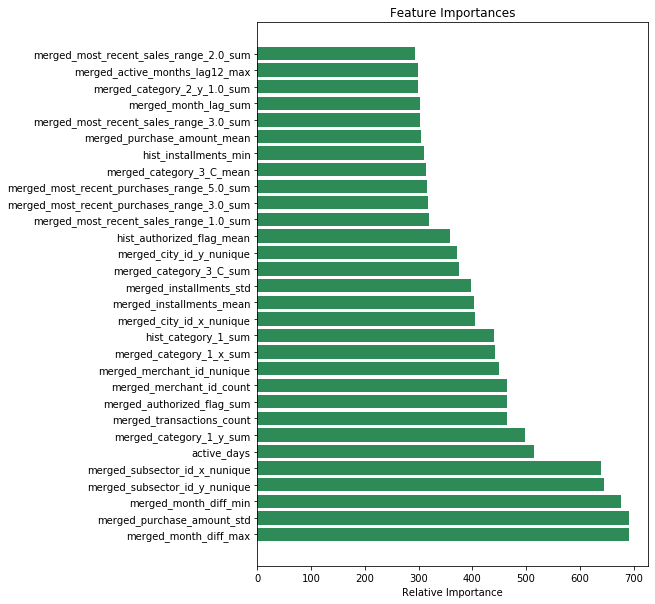

In [10]:
plt.figure(figsize=[7,10])
plt.title('Feature Importances')
plt.barh(range(len(impor)), impor, color='seagreen', align='center')
plt.yticks(range(len(fea)), [fea[i] for i in range(len(fea))])
plt.xlabel('Relative Importance')
plt.show()

## Plot the feature importance graph using random forest reggresion algorithm

In [13]:
from sklearn.ensemble import RandomForestRegressor

X = train_data.iloc[:,2:]  #independent columns
y = train_data.iloc[:,1] 

rnd_clf = RandomForestRegressor()
rnd_clf.fit(X, y)

df_train_columns = [c for c in train_data.columns if c not in ['card_id','target']]
col_names = df_train_columns
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)[::-1]

In [14]:
# Select 30 best features using random forest regression model
P = indices[:30]
Q = []
for index in P:
    Q.append(importances[index])

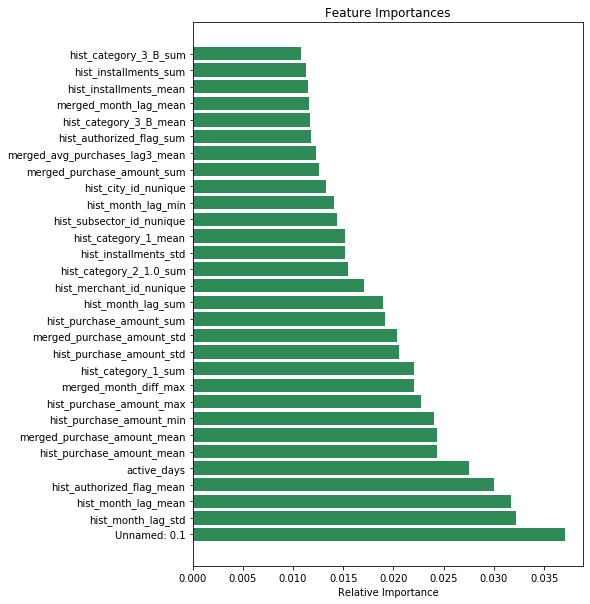

In [16]:
plt.figure(figsize=[7,10])
plt.title('Feature Importances')
plt.barh(range(len(Q)), Q, color='seagreen', align='center')
plt.yticks(range(len(P)), [col_names[i] for i in P])
plt.xlabel('Relative Importance')
plt.show()

## Train Linear Regression model on k-best features

In [9]:
## Build the test dataset using top k features
X_test = pd.DataFrame()
# X_test['card_id'] = test_data['card_id']
for col in X_train.columns:
    X_test[col] = test_data[col]
print(X_test)
Y_train = train_data['target']
# print(Y_train)
# print(X_train)

        merged_month_diff_max  merged_purchase_amount_std  \
0                        29.0                    0.182843   
1                        27.0                    0.068824   
2                        27.0                    1.151788   
3                        27.0                    0.073166   
4                        27.0                    6.028671   
...                       ...                         ...   
123618                    0.0                    0.000000   
123619                   27.0                    0.091129   
123620                    0.0                    0.000000   
123621                   31.0                    0.074584   
123622                   27.0                    0.000000   

        merged_month_diff_min  merged_subsector_id_y_nunique  \
0                        28.0                            3.0   
1                        27.0                            6.0   
2                        27.0                            2.0   
3          

In [20]:
from sklearn import linear_model
def linear_regression(X_train, X_test, Y_train):
    
#     X_train = train_data.iloc[:, 2:].values
#     Y_train = train_data.iloc[:, 1].values
#     X_test = test_data.iloc[:, 1:].values
    
    
    # Create linear regression object 
    regr = linear_model.LinearRegression()     
    regr.fit(X_train, Y_train)
    
    # Train predictions
    y_pred_train = regr.predict(X_train)
    print("Train predictions: ", y_pred_train)
    
    # Compute mean squared error
    error = (Y_train - y_pred_train)**2
    mse = np.sum(error)
    mse = mse/len(Y_train)
    rmse = np.sqrt(mse)
    print("Root Mean squared error on the train data: ", rmse)
    
    #Prediction
    y_pred=regr.predict(X_test)
    print("Test predictions: ",y_pred)
    
    return y_pred

linear_predictions = linear_regression(X_train, X_test, Y_train)

Train predictions:  [-0.35143245 -0.09238418 -0.1746943  ... -0.22538195 -1.11592012
 -0.75066816]
Root Mean squared error on the train data:  3.803014992173846
Test predictions:  [-24.27076962 -26.88635208 -10.0907876  ... -28.00251474 -16.58907413
 -26.98173037]


## Train the Random Forest Algorithm on k-best features

In [21]:
from sklearn.ensemble import RandomForestRegressor
def random_forest(X_train, X_test, Y_train):
    
#     X_train = train_data.iloc[:, 2:].values
#     Y_train = train_data.iloc[:, 1].values
#     X_test = test_data.iloc[:, 1:].values
    
    
    rf = RandomForestRegressor()   
    rf.fit(X_train, Y_train)
    
    # Train predictions
    y_pred_train = rf.predict(X_train)
    print("Train predictions: ", y_pred_train)
    
    # Compute mean squared error
    error = (Y_train - y_pred_train)**2
    mse = np.sum(error)
    mse = mse/len(Y_train)
    rmse = np.sqrt(mse)
    print("Root Mean squared error on the train data: ", rmse)
    
    #Prediction
    y_pred=rf.predict(X_test)
    print("Test predictions: ",y_pred)
    
    return y_pred

forest_predictions = random_forest(X_train, X_test, Y_train)
    

Train predictions:  [-0.6726118  -1.88088296  0.83846026 ...  0.14611646 -3.55343112
 -1.34317384]
Root Mean squared error on the train data:  1.592719275109929
Test predictions:  [ -8.65481766 -11.39299639  -3.20080416 ...  -2.87766468  -9.07170059
  -5.87383421]


## Train XGB model on k-best features

In [61]:
def XGB_model(X_train, X_test, Y_train):
    
    
    print("X_train", X_train.shape)
    print("X_test", X_test.shape)
    print("Y_train", Y_train.shape)
    
    classify = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)
    model = classify.fit(X_train,Y_train)
    
    # Train predictions
    y_pred_train = model.predict(X_train)
    print("Train predictions: ", y_pred_train)
    
    # Compute mean squared error
    error = (Y_train - y_pred_train)**2
    mse = np.sum(error)
    mse = mse/len(Y_train)
    rmse = np.sqrt(mse)
    print("Root Mean squared error on the train data: ", rmse)
    
    #Prediction
    y_pred= model.predict(X_test)
    print("Test predictions: ",y_pred)
    
    return y_pred

xgb_predictions = XGB_model(X_train, X_test, Y_train)

X_train (201917, 30)
X_test (123623, 30)
Y_train (201917,)
Train predictions:  [-0.11891657 -0.2606684   0.35971928 ... -0.02561241 -1.4981693
 -0.05761558]
Root Mean squared error on the train data:  3.797227286307738
Test predictions:  [-0.58309865 -0.50397694 -0.6430075  ... -0.34296238 -0.277045
 -0.34474957]


## Train Light GBM model on k-best features

In [10]:
def Light_gbm_model(X_train, X_test, Y_trai):
    
#     X_train = train_data.iloc[:, 2:].values
#     Y_train = train_data.iloc[:, 1].values
#     X_test = test_data.iloc[:, 1:].values
    
    print("X_train", X_train.shape)
    print("X_test", X_test.shape)
    print("Y_train", Y_train.shape)
    
    d_train = lgb.Dataset(X_train, label=Y_train)
    params = {}
    params['learning_rate'] = 0.001
    params['boosting_type'] = 'gbdt'
    params['objective'] = 'regression'
    params['metric'] = 'mse'
    params['num_leaves'] = 300
    params['min_data'] = 200
    
    clf = lgb.train(params, d_train, 500)
    
    # Train predictions
    y_pred_train = clf.predict(X_train)
    print("Train predictions: ", y_pred_train)
    
    # Compute mean squared error
    error = (Y_train - y_pred_train)**2
    mse = np.sum(error)
    mse = mse/len(Y_train)
    rmse = np.sqrt(mse)
    print("Mean squared error on the train data: ", rmse)
    
    #Prediction
    y_pred=clf.predict(X_test)
    print("Test predictions: ",y_pred)
    
    return y_pred

light_gbm_predictions = Light_gbm_model(X_train, X_test, Y_train) 

X_train (201917, 50)
X_test (123623, 50)
Y_train (201917,)
Train predictions:  [-0.44680115 -0.65135885  0.52257787 ... -0.17886513 -2.08368984
 -0.34393454]
Mean squared error on the train data:  3.6619173780508913
Test predictions:  [-0.85231539 -0.9136057   0.6610569  ...  1.12592272 -0.8347827
  1.79988162]


# Train model on all features

In [36]:
test_data

,card_id,feature_1,feature_2,feature_3,active_days,feature_sum,feature_mean,feature_max,feature_min,feature_var,...,merged_category_2_y_1.0_sum,merged_category_2_y_1.0_mean,merged_category_2_y_2.0_sum,merged_category_2_y_2.0_mean,merged_category_2_y_3.0_sum,merged_category_2_y_3.0_mean,merged_category_2_y_4.0_sum,merged_category_2_y_4.0_mean,merged_category_2_y_5.0_sum,merged_category_2_y_5.0_mean
0,C_ID_0ab67a22ab,3,3,1,275,7,2.333333,3,1,1.154701,...,3.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,C_ID_130fd0cbdd,2,3,0,365,5,1.666667,3,0,1.527525,...,3.0,0.300000,0.0,0.0,0.0,0.000000,7.0,0.7,0.0,0.0
2,C_ID_b709037bc5,5,1,1,153,7,2.333333,5,1,2.309401,...,1.0,0.500000,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.5
3,C_ID_d27d835a9f,2,1,0,31,3,1.000000,2,0,1.000000,...,10.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,C_ID_2b5e3df5c2,5,1,1,762,7,2.333333,5,1,2.309401,...,0.0,0.000000,0.0,0.0,0.0,0.000000,6.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123618,C_ID_7a239d2eda,2,2,0,92,4,1.333333,2,0,1.154701,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
123619,C_ID_75ace375ae,3,1,1,122,5,1.666667,3,1,1.154701,...,4.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
123620,C_ID_21d56d950c,5,1,1,487,7,2.333333,5,1,2.309401,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
123621,C_ID_6c46fc5a9d,2,1,0,214,3,1.000000,2,0,1.000000,...,1.0,0.166667,0.0,0.0,5.0,0.833333,0.0,0.0,0.0,0.0


In [11]:
X_train = train_data.iloc[:, 2:].values
Y_train = train_data.iloc[:, 1].values
X_test = test_data.iloc[:, 1:].values

In [ ]:
# Note: Linear regression and random forest algorithm are 

In [39]:
xgb_predictions_all = XGB_model(X_train, X_test, Y_train)

X_train (201917, 144)
X_test (123623, 144)
Y_train (201917,)
Train predictions:  [-0.15035349 -0.03062707  0.4395387  ... -0.24554485 -0.621771
 -0.03237283]
Root Mean squared error on the train data:  3.7692937001455955
Test predictions:  [-0.81003153 -0.17134953 -0.16908723 ...  0.05044219 -1.3131981
  0.10934487]


In [12]:
light_gbm_predictions_all = Light_gbm_model(X_train, X_test, Y_train)

X_train (201917, 144)
X_test (123623, 144)
Y_train (201917,)
Train predictions:  [-0.31957313 -0.58375542  0.47230629 ... -0.0931254  -2.56787741
 -0.44286289]
Mean squared error on the train data:  3.5904584348273665
Test predictions:  [-3.8056482  -0.46190069 -0.68257018 ...  0.20386724 -3.20696668
  0.23940987]


# Outliers

In [46]:
outliers = train_data.loc[train_data['target'] < -30]
wout_train_data = train_data.loc[train_data['target'] >= -30]
print("Dimension of training data without outliers: ", wout_train_data.shape)
print("Dimension of outliers data: ", outliers.shape)

Dimension of training data without outliers:  (199710, 146)
Dimension of outliers data:  (2207, 146)


In [47]:
wout_train_data

,card_id,target,feature_1,feature_2,feature_3,active_days,feature_sum,feature_mean,feature_max,feature_min,...,merged_category_2_y_1.0_sum,merged_category_2_y_1.0_mean,merged_category_2_y_2.0_sum,merged_category_2_y_2.0_mean,merged_category_2_y_3.0_sum,merged_category_2_y_3.0_mean,merged_category_2_y_4.0_sum,merged_category_2_y_4.0_mean,merged_category_2_y_5.0_sum,merged_category_2_y_5.0_mean
0,C_ID_92a2005557,-0.820283,5,2,1,245,8,2.666667,5,1,...,23.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,C_ID_3d0044924f,0.392913,4,1,0,396,5,1.666667,4,0,...,6.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,C_ID_d639edf6cd,0.688056,2,2,0,549,4,1.333333,2,0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0,1.0
3,C_ID_186d6a6901,0.142495,4,3,0,153,7,2.333333,4,0,...,1.0,0.142857,0.0,0.0,0.0,0.000000,6.0,0.857143,0.0,0.0
4,C_ID_cdbd2c0db2,-0.159749,1,3,0,92,4,1.333333,3,0,...,5.0,0.138889,0.0,0.0,7.0,0.194444,24.0,0.666667,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201912,C_ID_963962de2c,-2.740821,3,2,1,153,6,2.000000,3,1,...,0.0,0.000000,0.0,0.0,1.0,1.000000,0.0,0.000000,0.0,0.0
201913,C_ID_1314773c0b,0.312917,3,1,1,854,5,1.666667,3,1,...,1.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
201914,C_ID_7666735b3d,0.093494,4,3,0,184,7,2.333333,4,0,...,2.0,0.666667,0.0,0.0,1.0,0.333333,0.0,0.000000,0.0,0.0
201915,C_ID_73f5a0efd0,-4.676589,3,2,1,580,6,2.000000,3,1,...,5.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


## Train model without outliers

In [76]:
X_train = wout_train_data.iloc[:, 2:].values
Y_train = wout_train_data.iloc[:, 1].values
X_test = test_data.iloc[:, 1:].values
print(X_train.shape)
print(Y_train.shape)

(199710, 144)
(199710,)


In [49]:
xgb_predictions_wout = XGB_model(X_train, X_test, Y_train)

X_train (199710, 144)
X_test (123623, 144)
Y_train (199710,)
Train predictions:  [-0.13971394  0.27750087  0.7301585  ... -0.09305173 -0.71334136
 -0.01231098]
Root Mean squared error on the train data:  1.632545065731802
Test predictions:  [-0.05452722 -0.00855243 -0.01182616 ...  0.81147265 -0.12550843
  0.41833395]


In [77]:
light_gbm_predictions_wout = Light_gbm_model(X_train, X_test, Y_train)

X_train (199710, 144)
X_test (123623, 144)
Y_train (199710,)
Train predictions:  [-0.13228341 -0.07792343  0.19096505 ... -0.0057018  -0.7993048
 -0.17107504]
Mean squared error on the train data:  1.6225565200727519
Test predictions:  [-0.13598533 -0.06814472 -0.39387361 ...  0.3318092  -0.23292033
  0.02858579]


# Light GBM Model

In [24]:
from bayes_opt import BayesianOptimization
import gc

In [63]:
X_train = train_data.iloc[:, 2:].values
Y_train = train_data.iloc[:, 1].values
X_test = test_data.iloc[:, 1:].values
print(X_train)
print(Y_train)
print(X_test)

[[5. 2. 1. ... 0. 0. 0.]
 [4. 1. 0. ... 0. 0. 0.]
 [2. 2. 0. ... 0. 1. 1.]
 ...
 [4. 3. 0. ... 0. 0. 0.]
 [3. 2. 1. ... 0. 0. 0.]
 [3. 1. 1. ... 0. 0. 0.]]
[-0.8202826   0.39291325  0.68805599 ...  0.09349415 -4.67658938
 -1.85941301]
[[3.  3.  1.  ... 0.  0.  0. ]
 [2.  3.  0.  ... 0.7 0.  0. ]
 [5.  1.  1.  ... 0.  1.  0.5]
 ...
 [5.  1.  1.  ... 0.  0.  0. ]
 [2.  1.  0.  ... 0.  0.  0. ]
 [5.  1.  1.  ... 0.  0.  0. ]]


### Tune the hyperparameters using the Bayseian Optimization Method

In [25]:
def LGB_CV(
          max_depth,
          num_leaves,
          min_data_in_leaf,
          feature_fraction,
          bagging_fraction,
          lambda_l1
         ):
    
    folds = KFold(n_splits=5, shuffle=True, random_state=15)
    oof = np.zeros(len(X_train))
    predictions = np.zeros(len(X_test))
    
    fold_ = 0
    for trn_idx, val_idx in folds.split(X_train):
        print("fold n°{}".format(fold_))
        #trn_data = lgb.Dataset(train.iloc[trn_idx][features],label=target.iloc[trn_idx])
        trn_data = lgb.Dataset(X_train[trn_idx], label = Y_train[trn_idx])
        #val_data = lgb.Dataset(train.iloc[val_idx][features],label=target.iloc[val_idx])
        val_data = lgb.Dataset(X_train[val_idx], label = Y_train[val_idx])
        param = {
            'num_leaves': int(num_leaves),
            'min_data_in_leaf': int(min_data_in_leaf), 
            'objective':'regression',
            'max_depth': int(max_depth),
            'learning_rate': 0.01,
            "boosting": "gbdt",
            "feature_fraction": feature_fraction,
            "bagging_freq": 1,
            "bagging_fraction": bagging_fraction ,
            "bagging_seed": 11,
            "metric": 'rmse',
            "lambda_l1": lambda_l1,
            "verbosity": -1
        }
        print('~'*82)
        print(int(num_leaves),int(min_data_in_leaf),int(max_depth),feature_fraction,bagging_fraction,lambda_l1)
        print('~'*82)
        num_round = 10000
        clf = lgb.train(param,trn_data,num_round,valid_sets = [trn_data, val_data],verbose_eval=500,
                        early_stopping_rounds = 200)
        print(clf)
        oof[val_idx] = clf.predict(X_train[val_idx],num_iteration=clf.best_iteration)
        del clf, trn_idx, val_idx
        gc.collect()
        
    return -mean_squared_error(oof, target)**0.5

In [26]:
LGB_BO = BayesianOptimization(LGB_CV, {
    'max_depth': (4, 10),
    'num_leaves': (5, 130),
    'min_data_in_leaf': (10, 150),
    'feature_fraction': (0.7, 1.0),
    'bagging_fraction': (0.7,1.0),
    'lambda_l1': (0, 1)
    })

In [27]:
print('<','-'*80,'>')
LGB_BO.maximize(init_points=2, n_iter=10, acq='ei', xi=0.0)

< -------------------------------------------------------------------------------- >
|   iter    |  target   | baggin... | featur... | lambda_l1 | max_depth | min_da... | num_le... |
-------------------------------------------------------------------------------------------------
fold n°0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
49 72 8 0.7998969990057232 0.7231040779915815 0.8504753337368711
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Training until validation scores don't improve for 200 rounds
[500]	training's rmse: 3.55189	valid_1's rmse: 3.70281
[1000]	training's rmse: 3.47348	valid_1's rmse: 3.69759
Early stopping, best iteration is:
[1220]	training's rmse: 3.44367	valid_1's rmse: 3.69714
fold n°0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
49 72 8 0.7998969990057232 0.7231040779915815 0.8504753337368711
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Training until validation scores don't improve for 200 rounds
[500]	training's rmse: 3.69977	valid_1's rmse: 3.64909
[1000]	training's rmse: 3.67255	valid_1's rmse: 3.63927
[1500]	training's rmse: 3.65347	valid_1's rmse: 3.63534
[2000]	training's rmse: 3.63752	valid_1's rmse: 3.63297
[2500]	training's rmse: 3.62304	valid_1's rmse: 3.63143
Early stopping, best iteration is:
[2765]	training's rmse: 3.61469	valid_1's rmse: 3.63085
fold n°0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
129 148 4 0.7118899228033264 0.7738041658979464 0.2098625574273788
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Training until validation scores don't improve for 200 rounds
[500]	training's rmse: 3.65298	valid_1's rmse: 3.84066
[1000]	training's rmse: 3.62526	valid_1's rmse: 3.82998
[1500]	training's rmse: 3.60686	valid_1's rmse: 3.82591
[2000]	training's rmse: 3.59153	valid_1's rmse: 3.82386
[2500]	training's rmse: 3.57748	valid_1's

Training until validation scores don't improve for 200 rounds
[500]	training's rmse: 3.27717	valid_1's rmse: 3.70149
Early stopping, best iteration is:
[602]	training's rmse: 3.23678	valid_1's rmse: 3.70031
fold n°0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
127 11 9 0.7439776331398084 0.9548204752661081 0.6354207393847167
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Training until validation scores don't improve for 200 rounds
[500]	training's rmse: 3.28582	valid_1's rmse: 3.65264
[1000]	training's rmse: 3.11954	valid_1's rmse: 3.65202
Early stopping, best iteration is:
[831]	training's rmse: 3.16932	valid_1's rmse: 3.65139
fold n°0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
127 11 9 0.7439776331398084 0.9548204752661081 0.6354207393847167
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Training until validation scores don't improve f

fold n°0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
75 91 9 0.8842381050943829 0.9017654405888771 0.8079029257226618
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Training until validation scores don't improve for 200 rounds
[500]	training's rmse: 3.5015	valid_1's rmse: 3.69891
Early stopping, best iteration is:
[794]	training's rmse: 3.4397	valid_1's rmse: 3.69671
fold n°0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
75 91 9 0.8842381050943829 0.9017654405888771 0.8079029257226618
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Training until validation scores don't improve for 200 rounds
[500]	training's rmse: 3.51239	valid_1's rmse: 3.65124
[1000]	training's rmse: 3.41807	valid_1's rmse: 3.64827
Early stopping, best iteration is:
[1100]	training's rmse: 3.40188	valid_1's rmse: 3.64784
fold n°0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Training until validation scores don't improve for 200 rounds
[500]	training's rmse: 3.56689	valid_1's rmse: 3.6374
[1000]	training's rmse: 3.47952	valid_1's rmse: 3.63155
Early stopping, best iteration is:
[971]	training's rmse: 3.48358	valid_1's rmse: 3.63144
fold n°0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
27 12 9 0.803315632838352 0.9959891335543531 0.1666235227784606
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Training until validation scores don't improve for 200 rounds
[500]	training's rmse: 3.51635	valid_1's rmse: 3.82468
[1000]	training's rmse: 3.42809	valid_1's rmse: 3.81802
[1500]	training's rmse: 3.36237	valid_1's rmse: 3.81636
Early stopping, best iteration is:
[1488]	training's rmse: 3.36393	valid_1's rmse: 3.81622
fold n°0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
27 12 9 0.803315632838352 0.9959891335543531 0.1666235227784606
~~~~~~~~~~~~~~~~~~~~~~~

In [42]:
LGB_BO.res

[{'target': -3.6859914673335417,
  'params': {'bagging_fraction': 0.7231040779915815,
   'feature_fraction': 0.7998969990057232,
   'lambda_l1': 0.8504753337368711,
   'max_depth': 8.17622891529618,
   'min_data_in_leaf': 72.64210723430773,
   'num_leaves': 49.79271325707847}},
 {'target': -3.685159976374799,
  'params': {'bagging_fraction': 0.9300754825784995,
   'feature_fraction': 0.9640749098398742,
   'lambda_l1': 0.910540362168457,
   'max_depth': 7.70592319840995,
   'min_data_in_leaf': 136.86121192217706,
   'num_leaves': 75.630156950146}},
 {'target': -3.692644395604636,
  'params': {'bagging_fraction': 0.7738041658979464,
   'feature_fraction': 0.7118899228033264,
   'lambda_l1': 0.2098625574273788,
   'max_depth': 4.408746463339179,
   'min_data_in_leaf': 148.70876406490038,
   'num_leaves': 129.4081633112184}},
 {'target': -3.695298607020877,
  'params': {'bagging_fraction': 0.8022936967799437,
   'feature_fraction': 0.8744895057038493,
   'lambda_l1': 0.3675441292461933,
 

In [46]:
LGB_BO.res[0]['params']

{'bagging_fraction': 0.7231040779915815,
 'feature_fraction': 0.7998969990057232,
 'lambda_l1': 0.8504753337368711,
 'max_depth': 8.17622891529618,
 'min_data_in_leaf': 72.64210723430773,
 'num_leaves': 49.79271325707847}

In [ ]:
## Select best parameters 

In [47]:
max_target = -10
max_params = {}
for i in range(len(LGB_BO.res)):
    
    t = LGB_BO.res[i]['target']
    if t > max_target:
        max_target = t
        max_params = LGB_BO.res[i]['params']
        
print(max_target)
print(max_params)

-3.68244076157108
{'bagging_fraction': 0.8306828683695134, 'feature_fraction': 0.7013634057795507, 'lambda_l1': 0.8840050106231768, 'max_depth': 9.976709639831554, 'min_data_in_leaf': 137.86148669362618, 'num_leaves': 91.67079747359789}


### Light GBM Model with cross validation

In [64]:
from sklearn.model_selection import KFold

def Light_gbm_after_tuning(X_train, Y_train, X_test):
    
    print("X_train", X_train.shape)
    print("X_test", X_test.shape)
    print("Y_train", Y_train.shape)
    
    param = {'num_leaves': 92,
             'min_data_in_leaf': 138, 
             'objective':'regression',
             'max_depth': 10,
             'learning_rate': 0.01,
             "boosting": "gbdt",
             "feature_fraction": 0.7013634057795507 ,
             "bagging_fraction": 0.8306828683695134 ,
             "metric": 'rmse',
             "lambda_l1": 0.8840050106231768,
             "nthread": 4,
             "random_state": 4590}

    folds = KFold(n_splits=5, shuffle=True, random_state=4590)
    oof = np.zeros(len(train_data))
    predictions = np.zeros(len(test_data))
    feature_importance_df = pd.DataFrame()
    df_train_columns = [c for c in train_data.columns if c not in ['card_id','target']]

    fold_ = 1
    for trn_idx, val_idx in folds.split(X_train):
        print("fold {}".format(fold_))
        trn_data = lgb.Dataset(X_train[trn_idx], label=Y_train[trn_idx])
        val_data = lgb.Dataset(X_train[val_idx], label=Y_train[val_idx])

        num_round = 10000
        clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=500,
                            early_stopping_rounds = 200)
        oof[val_idx] = clf.predict(X_train[val_idx], num_iteration=clf.best_iteration)

        fold_importance_df = pd.DataFrame()
        fold_importance_df["Feature"] = df_train_columns
        fold_importance_df["importance"] = clf.feature_importance()
        fold_importance_df["fold"] = fold_
        fold_ += 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

        predictions += clf.predict(X_test, num_iteration=clf.best_iteration) / folds.n_splits

    Root_mean_squared_error = np.sqrt(mean_squared_error(oof, target))
    
    return Root_mean_squared_error, predictions

Root_mean_squared_error, lgb_pred = Light_gbm_after_tuning(X_train, Y_train, X_test)

X_train (201917, 144)
X_test (123623, 144)
Y_train (201917,)
fold 1
Training until validation scores don't improve for 200 rounds
[500]	training's rmse: 3.48274	valid_1's rmse: 3.7625
[1000]	training's rmse: 3.39538	valid_1's rmse: 3.76087
Early stopping, best iteration is:
[886]	training's rmse: 3.41205	valid_1's rmse: 3.76051
fold 2
Training until validation scores don't improve for 200 rounds
[500]	training's rmse: 3.51069	valid_1's rmse: 3.64283
Early stopping, best iteration is:
[766]	training's rmse: 3.45725	valid_1's rmse: 3.64141
fold 3
Training until validation scores don't improve for 200 rounds
[500]	training's rmse: 3.5032	valid_1's rmse: 3.67127
Early stopping, best iteration is:
[671]	training's rmse: 3.4668	valid_1's rmse: 3.67018
fold 4
Training until validation scores don't improve for 200 rounds
[500]	training's rmse: 3.49199	valid_1's rmse: 3.69582
[1000]	training's rmse: 3.39834	valid_1's rmse: 3.69372
Early stopping, best iteration is:
[891]	training's rmse: 3.4146

In [71]:
print(Root_mean_squared_error)
lgb_pred

3.6858959539174707


array([-3.14440315, -0.54125395, -0.61649524, ...,  0.27753177,
       -3.66527359,  0.3078329 ])

## Light GBM with hyper parameter tuning and after removing outliers

In [66]:
outliers = train_data.loc[train_data['target'] < -30]
wout_train_data = train_data.loc[train_data['target'] >= -30]
print("Dimension of training data without outliers: ", wout_train_data.shape)
print("Dimension of outliers data: ", outliers.shape)

X_train = wout_train_data.iloc[:, 2:].values
Y_train = wout_train_data.iloc[:, 1].values
X_test = test_data.iloc[:, 1:].values
print(X_train.shape)
print(Y_train.shape)

Dimension of training data without outliers:  (199710, 146)
Dimension of outliers data:  (2207, 146)
(199710, 144)
(199710,)


In [68]:
Root_mean_squared_error_wout, lgb_pred_wout = Light_gbm_after_tuning(X_train, Y_train, X_test)

X_train (199710, 144)
X_test (123623, 144)
Y_train (199710,)
fold 1
Training until validation scores don't improve for 200 rounds
[500]	training's rmse: 1.51119	valid_1's rmse: 1.58479
[1000]	training's rmse: 1.47476	valid_1's rmse: 1.58204
Early stopping, best iteration is:
[977]	training's rmse: 1.47601	valid_1's rmse: 1.58201
fold 2
Training until validation scores don't improve for 200 rounds
[500]	training's rmse: 1.51705	valid_1's rmse: 1.56091
[1000]	training's rmse: 1.48108	valid_1's rmse: 1.55866
Early stopping, best iteration is:
[1109]	training's rmse: 1.47459	valid_1's rmse: 1.5586
fold 3
Training until validation scores don't improve for 200 rounds
[500]	training's rmse: 1.51251	valid_1's rmse: 1.57958
[1000]	training's rmse: 1.47557	valid_1's rmse: 1.577
Early stopping, best iteration is:
[1067]	training's rmse: 1.47165	valid_1's rmse: 1.57696
fold 4
Training until validation scores don't improve for 200 rounds
[500]	training's rmse: 1.5172	valid_1's rmse: 1.56122
[1000]	

In [69]:
print(Root_mean_squared_error)

3.6858959539174707


In [70]:
lgb_pred_wout

array([-0.37893905, -0.15772454, -0.28478065, ...,  0.85805591,
       -0.72165555,  0.01314969])

In [72]:
def save_predictions(predictions, test_data):
    df = pd.DataFrame()
    df['card_id'] = test_data['card_id']
    df['target'] = predictions
    df.to_csv(r"G:\IIITD\SML\Project\elo_merchant_category\Baseline\submit_final_wout.csv")
    
save_predictions(lgb_pred_wout, test_data)